<a href="https://colab.research.google.com/github/luquelab/Bioinformatics-Underdogs/blob/main/Part_1_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install and import required libraries
!pip install biopython==1.80
from Bio import SeqIO
from google.colab import files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.2 MB/s eta 0:00:00


In [ ]:
#Install Clustal Omega
!apt-get install -y clustalo

#Verify Installation
!clustalo --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 2s (168 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 125044 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (13-1.1) ...
Selecting previously unselected package clustalo.
Preparing to unpack .../clustalo_1.2.4-7_amd64.deb ...
Unpacking clustalo (1.2.4-7) ...
Setting up

In [ ]:
from Bio import SeqIO

# Load sequences from the FASTA file
sequences = list(SeqIO.parse("sequences.fna", "fasta"))

# Print information for the first few sequences
for i in range(min(5, len(sequences))):  # Print for up to 5 sequences
    record = sequences[i]
    print(f"Sequence ID: {record.id}")
    print(f"Sequence Length: {len(record.seq)}")
    print(f"Sequence Snippet: {record.seq[:20]}...")  # Print first 20 bases
    print("-" * 20)

Sequence ID: Sequence_1
Sequence Length: 852
Sequence Snippet: atggcgaacaccattaacct...
--------------------
Sequence ID: Sequence_2
Sequence Length: 843
Sequence Snippet: atggcgattgatctggtggc...
--------------------
Sequence ID: Sequence_3
Sequence Length: 1053
Sequence Snippet: atgaccgtgaaagcgatggc...
--------------------
Sequence ID: Sequence_4
Sequence Length: 1494
Sequence Snippet: atgagcaaaattgcggtgat...
--------------------
Sequence ID: Sequence_5
Sequence Length: 678
Sequence Snippet: atgtgcgtgtatggctattg...
--------------------


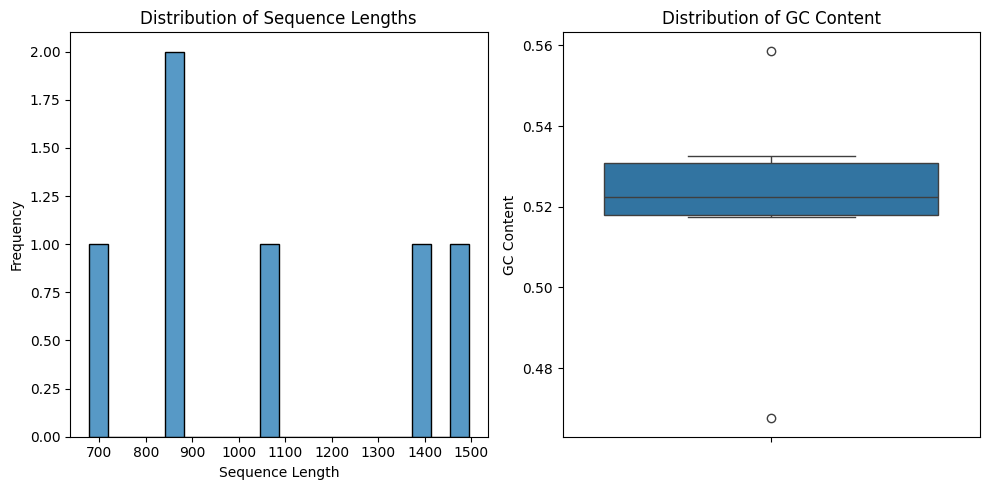

In [ ]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load sequences from the FASTA file
sequences = list(SeqIO.parse("sequences.fna", "fasta"))

# Create a list to store sequence data
sequence_data = []
for record in sequences:
    sequence_id = record.id
    sequence_length = len(record.seq)
    gc_content = (record.seq.count('g') + record.seq.count('c')) / sequence_length
    sequence_data.append([sequence_id, sequence_length, gc_content])

# Create a pandas DataFrame
df = pd.DataFrame(sequence_data, columns=['Sequence ID', 'Sequence Length', 'GC Content'])

# DataFrame documentation
"""
DataFrame: df

Columns:
- Sequence ID: Unique identifier for each sequence.
- Sequence Length: Number of bases in the sequence.
- GC Content: Proportion of G and C bases in the sequence.
"""

# Exploratory visualizations
plt.figure(figsize=(10, 5))

# Histogram of Sequence Length
plt.subplot(1, 2, 1)
sns.histplot(df['Sequence Length'], bins=20)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

# Boxplot of GC Content
plt.subplot(1, 2, 2)
sns.boxplot(y=df['GC Content'])
plt.title('Distribution of GC Content')
plt.ylabel('GC Content')

plt.tight_layout()
plt.show()

In [ ]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

# Load sequences from the FASTA file
sequences = list(SeqIO.parse("sequences.fna", "fasta"))

# Translate each sequence and store as new SeqRecord objects
protein_sequences = []
for record in sequences:
    protein_seq = record.seq.translate()  # Translate the nucleotide sequence
    protein_record = SeqRecord(protein_seq, id=record.id, description="Translated sequence")
    protein_sequences.append(protein_record)

# Print the first few protein sequences
for i in range(min(5, len(protein_sequences))):
    record = protein_sequences[i]
    print(f"Sequence ID: {record.id}")
    print(f"Protein Sequence: {record.seq[:20]}...")  # Print first 20 amino acids
    print("Amino Acid Length", len(record.seq))
    print("-" * 20)

    # Save the protein sequences to a new FASTA file
    SeqIO.write(protein_sequences, "protein_sequences.fasta", "fasta")

Sequence ID: Sequence_1
Protein Sequence: MANTINLVTKFAPYVDEQFT...
Amino Acid Length 284
--------------------
Sequence ID: Sequence_2
Protein Sequence: MAIDLVAKFLPYVDEMFTTE...
Amino Acid Length 281
--------------------
Sequence ID: Sequence_3
Protein Sequence: MTVKAMALNTNQLFAYLNRG...
Amino Acid Length 351
--------------------
Sequence ID: Sequence_4
Protein Sequence: MSKIAVIYARYSSDKQTEDS...
Amino Acid Length 498
--------------------
Sequence ID: Sequence_5
Protein Sequence: MCVYGYCRISTKQQSIERQI...
Amino Acid Length 226
--------------------


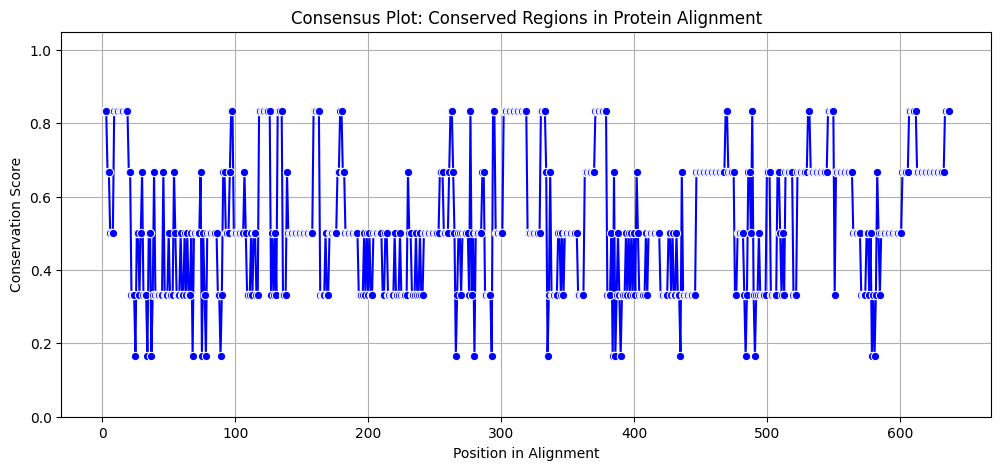

In [ ]:
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio import AlignIO

# Perform MSA using Clustal Omega
aligned_fasta = "aligned_proteins.fasta"
protein_fasta = "protein_sequences.fasta" # Define protein_fasta with the correct file name
clustalomega_cline = ClustalOmegaCommandline(infile=protein_fasta, outfile=aligned_fasta, verbose=True, auto=True)
clustalomega_cline()

# Load the alignment
alignment = AlignIO.read(aligned_fasta, "fasta")

# Compute conservation scores
alignment_length = alignment.get_alignment_length()
conservation_scores = [0] * alignment_length

for i in range(alignment_length):
    column = [record.seq[i] for record in alignment]
    most_common = max(set(column), key=column.count)
    conservation_scores[i] = column.count(most_common) / len(column)

# Visualization
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, alignment_length + 1), y=conservation_scores, marker="o", color="blue")
plt.xlabel("Position in Alignment")
plt.ylabel("Conservation Score")
plt.title("Consensus Plot: Conserved Regions in Protein Alignment")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

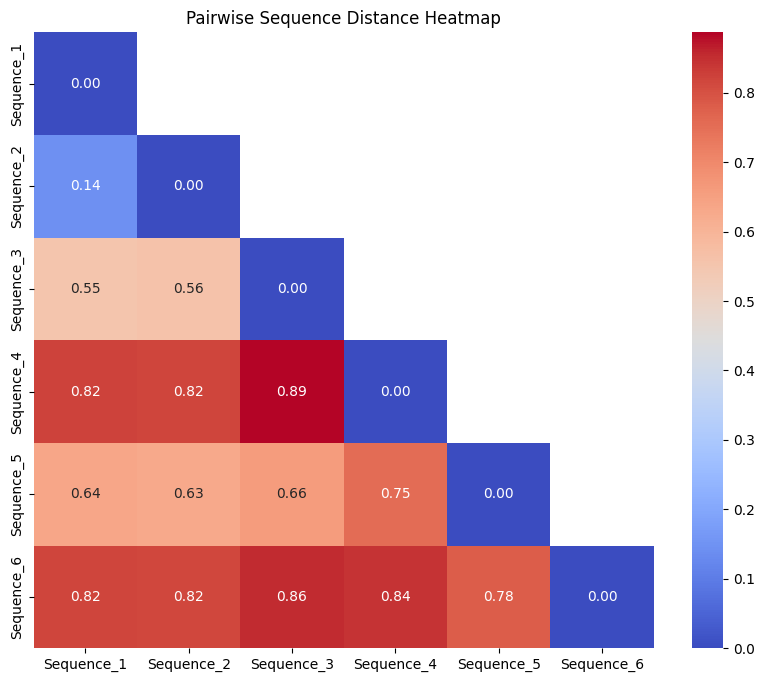

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Align import MultipleSeqAlignment

# Compute distance matrix
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)

# Convert to DataFrame
df_dist = pd.DataFrame(distance_matrix.matrix, index=distance_matrix.names, columns=distance_matrix.names)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_dist, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Pairwise Sequence Distance Heatmap")
plt.savefig("heatmap.png")
plt.show()


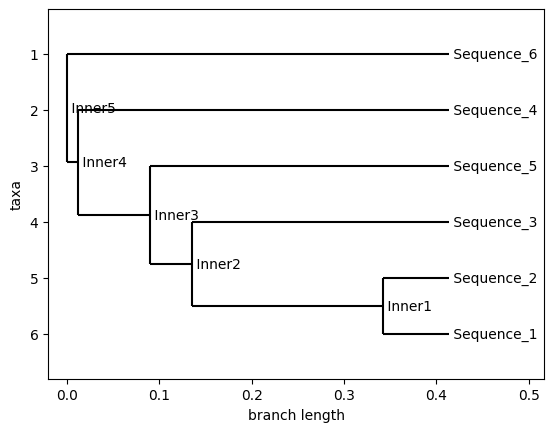

1

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import Bio.Phylo as Phylo

# Construct tree using UPGMA
constructor = DistanceTreeConstructor()
tree = constructor.upgma(distance_matrix)

# Save and visualize tree
Phylo.draw(tree)
tree_path = "phylogenetic_tree.nwk"
Phylo.write(tree, tree_path, "newick")


In [ ]:
from Bio.Blast import NCBIWWW, NCBIXML

# Perform BLAST search (may take time)
blast_results = NCBIWWW.qblast("blastp", "nr", protein_sequences[0].seq)

# Parse BLAST results
blast_records = NCBIXML.read(blast_results)

# Extract relevant data
hits = []
for alignment in blast_records.alignments:
    for hsp in alignment.hsps:
        hits.append([alignment.title, hsp.expect])

# Convert to DataFrame
df_blast = pd.DataFrame(hits, columns=["Hit", "E-value"])
df_blast.to_csv("blast_results.csv", index=False)

# Display top hits
df_blast.head()


,Hit,E-value
0,tpg|DAF60711.1| MAG TPA: major capsid protein ...,0.000000e+00
1,ref|WP_325301977.1| hypothetical protein [uncu...,7.649500e-173
2,ref|WP_240287488.1| hypothetical protein [Laws...,6.627570e-171
3,gb|MBS5589747.1| hypothetical protein [Clostri...,1.061870e-170
4,ref|WP_276920628.1| hypothetical protein [Nega...,3.191910e-161


In [ ]:
from Bio import Phylo
import pandas as pd

# Save the distance matrix as a CSV file
df_dist.to_csv("distance_matrix.csv")

# Save the multiple sequence alignment in Clustal format
AlignIO.write(alignment, "aligned_proteins.clustal", "clustal")

# Save the phylogenetic tree in multiple formats
Phylo.write(tree, "phylogenetic_tree.nhx", "phyloxml")  # PhyloXML format
Phylo.write(tree, "phylogenetic_tree.svg", "svg")  # Scalable vector graphic

print("All analysis objects have been exported successfully.")


ModuleNotFoundError: No module named 'Bio'